# Ejercicio 7 - Aprendizaje por Refuerzos
## Inteligencia Artificial - Ing. en Sistemas de Información 
## UTN Facultad Regional Villa Maria
### Natalia Bruno - Legajo: 10683

### Punto 1

Se parte de la implementación base del entorno descripto en el ejercicio:

In [1]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

1.1 Genere una gráfica que muestre la evolución del cálculo "np.sum(np.abs(world - newWorld))", para cada paso de actualización realizado hasta lograr la convergencia.

In [2]:
iteracion = []
evolucion = []  
nroiteracion = 0

#Iteración de Valor
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i in range(0, WORLD_SIZE):
        for j in range(0, WORLD_SIZE):
            for action in actions:
                newPosition = nextState[i][j][action]
                # Actualización basada en Bellman
                newWorld[i, j] += actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
   
    #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteración
    evolucion.append(np.sum(np.abs(world - newWorld)))
    nroiteracion += 1
    
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Aleatoria')
        print(newWorld)
        break
    
    world = newWorld

Política Aleatoria
[[ 3.30902999  8.78932551  4.42765281  5.3224012   1.49221235]
 [ 1.52162172  2.9923515   2.25017358  1.90760531  0.5474363 ]
 [ 0.05085614  0.73820423  0.67314689  0.35821982 -0.40310755]
 [-0.97355865 -0.43546179 -0.35484864 -0.58557148 -1.18304148]
 [-1.8576669  -1.34519762 -1.22923364 -1.42288454 -1.97514545]]


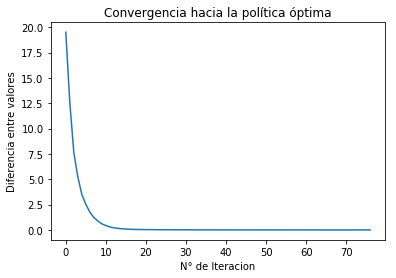

In [3]:
import matplotlib.pyplot as plt

plt.plot(range(0, nroiteracion), evolucion, '-')
plt.xlabel('N° de Iteracion')
plt.ylabel('Diferencia entre valores')
plt.title('Convergencia hacia la política óptima')
plt.show()

1.2 Modifique el algoritmo anterior para encontrar el valor de la política óptima. Genere una gráfica que muestre la evolución del cálculo "np.sum(np.abs(world - newWorld))", para cada paso de actualización realizado hasta lograr la convergencia.

In [4]:
evolucion = []  
iteracion = 0
valorpolitica = 0
primero = True

#Iteración de Valor
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    politica_optima = []
    for i in range(0, WORLD_SIZE):
        politica_optima.append([]) 
        for j in range(0, WORLD_SIZE):
            politica_optima[i].append([])  
            for action in actions:
                newPosition = nextState[i][j][action]
                
                # Actualización basada en Bellman
                if primero:
                    v_max = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                    newWorld[i, j] = v_max
                    primero = False
                else:
                    temp = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]           
                    if temp >= v_max:
                        v_max = temp
                        newWorld[i, j] = v_max
                        
            primero = True
            
            #en esta variable sumamos los valores maximos de V(s) para cada una de las posiciones, lo que es equivalente al valor de la política óptima
            #valorpolitica = valorpolitica + newWorld[i, j]
            
            for action in actions:
                newPosition = nextState[i][j][action]
                #Buscamos aquellas acciones que generan el mayor reward en un determinado estado.
                v = actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]]
                if v == newWorld[i, j]:
                    politica_optima[i][j].append(action)
                    
             
                                   
    #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteracion
    evolucion.append(np.sum(np.abs(world - newWorld)))
    iteracion += 1
        
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('El valor de la política óptima es: ', np.sum(newWorld))
        print('Política Optima')
        print(newWorld)
        print('Acciones de la Política Óptima')
        print(np.array(politica_optima))
        #print(np.sum(newWorld))
        break
    
    world = newWorld

El valor de la política óptima es:  433.214656249
Política Optima
[[ 21.97745846  24.41939829  21.97745846  19.41939829  17.47745846]
 [ 19.77970418  21.97745846  19.77970418  17.8017304   16.02155548]
 [ 17.8017304   19.77970418  17.8017304   16.02155548  14.41939829]
 [ 16.02155548  17.8017304   16.02155548  14.41939829  12.97745846]
 [ 14.41939829  16.02155548  14.41939829  12.97745846  11.67970418]]
Acciones de la Política Óptima
[[['R'] ['L', 'U', 'R', 'D'] ['L'] ['L', 'U', 'R', 'D'] ['L']]
 [['U', 'R'] ['U'] ['L', 'U'] ['L'] ['L']]
 [['U', 'R'] ['U'] ['L', 'U'] ['L', 'U'] ['L', 'U']]
 [['U', 'R'] ['U'] ['L', 'U'] ['L', 'U'] ['L', 'U']]
 [['U', 'R'] ['U'] ['L', 'U'] ['L', 'U'] ['L', 'U']]]


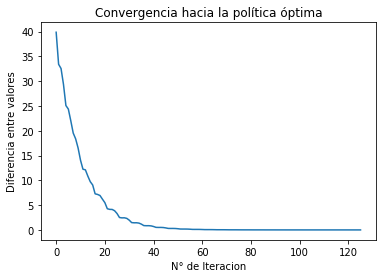

In [5]:
#plt.figure(figsize=(15, 8))
plt.plot(range(0, iteracion), evolucion, '-')
plt.xlabel('N° de Iteracion')
plt.ylabel('Diferencia entre valores')
plt.title('Convergencia hacia la política óptima')
plt.show()

## Punto 2

2.1 Implemente un algoritmo de Iteración de Valor para obtener la política óptima del robot de reciclaje.

In [6]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 2
discount = 0.9
alfa= 0.9
beta= 0.1
r_search = 5
r_wait = 2

world = np.zeros(WORLD_SIZE)

# acciones search, wait, recharge
actions = ['SEARCH', 'WAIT', 'RECHARGE']

# Definimos la función de reward para cada una de las acciones en cada estado.
actionReward = []
for i in range(0, WORLD_SIZE):
    actionReward.append([])
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[0].append(dict({'SEARCH': r_search, 'WAIT': r_wait})) 
actionReward[1].append(dict({'SEARCH': -3, 'WAIT': r_wait, 'RECHARGE': 0})) 
actionReward[1].append(dict({'SEARCH': r_search, 'WAIT': r_wait, 'RECHARGE': 0}))
    
#print(actionReward)

#Defino una funcion que permite obtener el proximo estado, recibiendo como entradas el estado actual y la accion realizada.
#Se realiza un "sorteo" donde utilize la funcion numpy.random.choice 
#Random.choice permite generar una muestra a partir de un vector con probabilidades distintas para cada uno de sus elementos.
def next_state(i, action):
    nextState = 0
    estados = [0, 1]
    p = [] #Probabilidades para los estados
    
    if i == 0 and action == 'SEARCH':
        sorteo = np.random.choice(estados, p=[alfa, 1-alfa])
        nextState = sorteo
    
    if i == 0 and action == 'WAIT':
        sorteo = np.random.choice(estados, p=[1, 0])
        nextState = sorteo
        
    if i == 1 and action == 'SEARCH':
        sorteo = np.random.choice(estados, p=[1-beta, beta])
        nextState = sorteo
        
    if i == 1 and action == 'WAIT':
        sorteo = np.random.choice(estados, p=[0, 1])
        nextState = sorteo
        
    if i == 1 and action == 'RECHARGE':
        nextState = 0
    
    # print(nextState, actionReward[i][nextState][action])
    return nextState, actionReward[i][nextState][action]

In [7]:
evolucion = []  
iteracion = 0

primero = True

while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros(WORLD_SIZE)
    politica = []
    vector_newPosition = []
    vector_reward = []
    
    for i in range(0, WORLD_SIZE):
        politica.append([])
        for action in actions:
            vector_newPosition.append([])
            vector_reward.append([])
            #Se realiza la siguiente comprobacion, para evitar que desde el estado "HIGH" se recarge la batería.
            if i == 1 or (i == 0 and action != 'RECHARGE'): 
                # Actualización basada en Bellman
                newPosition, reward = next_state(i, action)
                
                #Se guardan las acciones que se ejecutaron para obtener el reward en cada estado
                #Esto es porque al realizarce un sorteo, luego cuando queremos obtener las acciones que devolvieron el v(S) maximo podrian variar los resultados
                vector_newPosition[actions.index(action)] = newPosition
                vector_reward[actions.index(action)] = reward                
                
                if primero:
                    v_max = reward + discount * world[newPosition]
                    newWorld[i] = v_max
                    primero = False
                else:
                    temp = reward + discount * world[newPosition]           
                    if temp >= v_max:
                        v_max = temp
                        newWorld[i] = v_max
                        
        primero = True         
                
        for action in actions:
            if i == 1 or (i == 0 and action != 'RECHARGE'):
                v = vector_reward[actions.index(action)] + discount * world[vector_newPosition[actions.index(action)]]
                if v == v_max:
                    politica[i].append(action)
                    
    #Datos para la grafica
    evolucion.append(np.sum(np.abs(world - newWorld)))
    iteracion += 1
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Óptima')
        print(politica)
        print('Valor de la política óptima: {}'.format(np.sum(newWorld)))
        break
    world = newWorld

Política Óptima
[['SEARCH'], ['RECHARGE']]
Valor de la política óptima: 94.9991297796462


Se logra la convergencia en la iteración k=10440


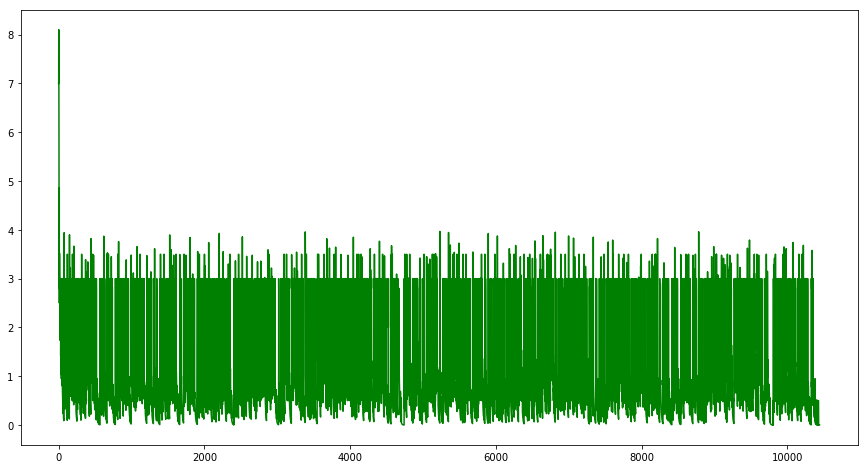

In [8]:
import matplotlib.pyplot as plt
print('Se logra la convergencia en la iteración k={}'.format(np.argmin(evolucion)))
plt.figure(figsize=(15, 8))
plt.plot(range(0, iteracion), evolucion, 'g-')
plt.show()


2.2 Utilice el algoritmo implementado en (2.1) para evaluar cómo cambia el valor de la política óptima a partir de alterar  $\alpha$, $\beta$ para un valor de $R_{search}=5 $ y $R_{wait} = 2$. Para dicha evaluación, emplee una gráfica que permita determinar cuáles son los valores de dichas variables que maximizan el retorno esperado por el agente en cada estado. AYUDA: Varíe algoritmicamente los valores de $\alpha$ y $\beta$ y calcule la política óptima correspondiente. La gráfica debería presentar tres ejes: $\alpha$, $\beta$, y una variable que totalice los valores de los estados.

In [9]:
alfas = np.linspace(0.1, 0.9, 10)
print(alfas)

[ 0.1         0.18888889  0.27777778  0.36666667  0.45555556  0.54444444
  0.63333333  0.72222222  0.81111111  0.9       ]


In [12]:
betas = np.linspace(0.1, 0.9, 10)
print(betas)

[ 0.1         0.18888889  0.27777778  0.36666667  0.45555556  0.54444444
  0.63333333  0.72222222  0.81111111  0.9       ]


In [14]:
valorpolitica = []
alfas_grafica = []
betas_grafica = []

for alfa in alfas:
    for beta in betas:
        alfas_grafica.append(alfa)
        betas_grafica.append(beta)
        
        evolucion = []  
        iteracion = 0

        primero = True

        while True:
            # Se itera hasta lograr la convergencia
            newWorld = np.zeros(WORLD_SIZE)
            politica = []
            vector_newPosition = []
            vector_reward = []

            for i in range(0, WORLD_SIZE):
                politica.append([])
                for action in actions:
                    vector_newPosition.append([])
                    vector_reward.append([])
                    #Se realiza la siguiente comprobacion, para evitar que desde el estado "HIGH" se recarge la batería.
                    if i == 1 or (i == 0 and action != 'RECHARGE'): 
                        # Actualización basada en Bellman
                        newPosition, reward = next_state(i, action)

                        #Se guardan las acciones que se ejecutaron para obtener el reward en cada estado
                        #Esto es porque al realizarce un sorteo, luego cuando queremos obtener las acciones que devolvieron el v(S) maximo podrian variar los resultados
                        vector_newPosition[actions.index(action)] = newPosition
                        vector_reward[actions.index(action)] = reward                

                        if primero:
                            v_max = reward + discount * world[newPosition]
                            newWorld[i] = v_max
                            primero = False
                        else:
                            temp = reward + discount * world[newPosition]           
                            if temp >= v_max:
                                v_max = temp
                                newWorld[i] = v_max
                        
                primero = True   
                                
                for action in actions:
                    if i == 1 or (i == 0 and action != 'RECHARGE'):
                        v = vector_reward[actions.index(action)] + discount * world[vector_newPosition[actions.index(action)]]
                        if v == v_max:
                            politica[i].append(action)
                            

            #Datos para la grafica
            evolucion.append(np.sum(np.abs(world - newWorld)))
            iteracion += 1
            if np.sum(np.abs(world - newWorld)) < 1e-3:
                valorpolitica.append(np.sum(newWorld))
                break
                
            if iteracion > 10000:
                valorpolitica.append(np.sum(newWorld))
                break
                
            world = newWorld
            

In [15]:
print(np.array(valorpolitica))

[ 58.91928424  57.7062301   77.47072659  70.70389907  77.62084999
  79.01382648  80.50901641  74.35458156  91.10955389  89.38777307
  58.65580189  59.05958627  70.07250611  71.58037944  68.62355205
  80.14644038  88.57463295  89.37680892  89.95407979  99.99114374
  64.49820575  75.29548257  62.82871275  70.79497804  77.69598908
  78.92472234  77.10275486  88.7111897   94.95181247  99.99165003
  99.99165003  74.45383465  79.36394112  70.57786682  79.55673522
  80.49129109  90.31529132  90.8771315   87.98522309  98.58531159
  68.04255082  77.19939305  74.21521197  68.66780042  76.59545362
  75.50244697  87.30161607  87.31679108  94.62817607  87.76823972
  74.82949372  79.37514618  83.01049706  78.47235941  74.30413787
  86.76769161  88.01426227  80.0296214   93.21559036  99.99169547
  71.46063423  75.29829208  74.32022996  86.87835445  79.2739249
  83.61022479  89.57926478  94.23038868  90.92032958  97.44567223
  90.36839387  86.72600683  79.29874377  81.53968386  80.16302412
  86.778374

El retorno máximo esperado total para todos los estados es de 99.99169546631151 y se obtiene con alfa=0.5444444444444445 y beta=0.9


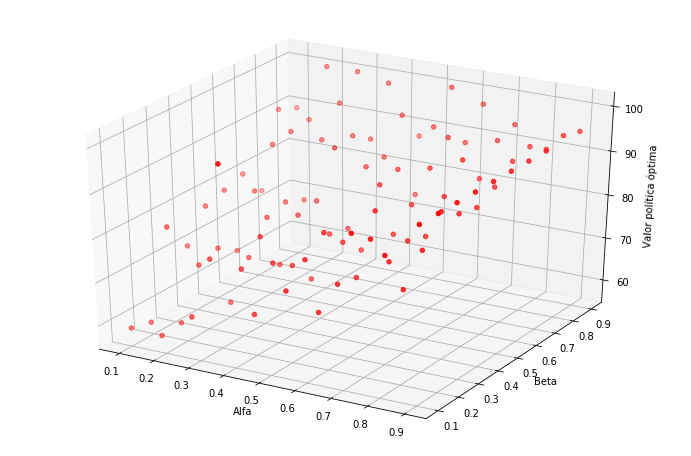

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 8))   
ax = fig.add_subplot(111, projection='3d')

xs = alfas_grafica
ys = betas_grafica
zs = valorpolitica
ax.scatter(xs, ys, zs, c='r', marker='o')
    
max_val = max(valorpolitica)
arg_max = np.argmax(valorpolitica)
beta_max = betas_grafica[arg_max]
alfa_max = alfas_grafica[arg_max]
print('El retorno máximo esperado total para todos los estados es de {} y se obtiene con alfa={} y beta={}'.format(
    max_val, alfa_max, beta_max))

 
ax.set_xlabel('Alfa')
ax.set_ylabel('Beta')
ax.set_zlabel('Valor política óptima')

plt.show()

2.3 Con los mejores valores de $\alpha$ y $\beta$ obtenidos en 2.2, realice la misma operación variando $R_{search} $  con un tope de 10, manteniendo $R_{wait}$ = en 4. 

In [21]:
alfa= alfa_max
beta= beta_max
r_search = np.linspace(5, 10, 6)
r_wait = 4

In [22]:
def next_state_modificado(i, action, r):
    actionReward = []
    for i in range(0, WORLD_SIZE):
        actionReward.append([])
    actionReward[0].append(dict({'SEARCH': r, 'WAIT': r_wait})) 
    actionReward[0].append(dict({'SEARCH': r, 'WAIT': r_wait})) 
    actionReward[1].append(dict({'SEARCH': -3, 'WAIT': r_wait, 'RECHARGE': 0})) 
    actionReward[1].append(dict({'SEARCH': r, 'WAIT': r_wait, 'RECHARGE': 0}))

    nextState = 0
    estados = [0, 1]
    p = [] #Probabilidades para los estados
    
    if i == 0 and action == 'SEARCH':
        sorteo = np.random.choice(estados, p=[alfa, 1-alfa])
        nextState = sorteo
    
    if i == 0 and action == 'WAIT':
        sorteo = np.random.choice(estados, p=[1, 0])
        nextState = sorteo
        
    if i == 1 and action == 'SEARCH':
        sorteo = np.random.choice(estados, p=[1-beta, beta])
        nextState = sorteo
        
    if i == 1 and action == 'WAIT':
        sorteo = np.random.choice(estados, p=[0, 1])
        nextState = sorteo
        
    if i == 1 and action == 'RECHARGE':
        nextState = 0
    
    # print(nextState, actionReward[i][nextState][action])
    return nextState, actionReward[i][nextState][action]

In [23]:
valorpolitica = []
rs = []

for r in r_search:
    rs.append(r)
    evolucion = []  
    iteracion = 0

    primero = True

    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros(WORLD_SIZE)
        politica = []
        vector_newPosition = []
        vector_reward = []

        for i in range(0, WORLD_SIZE):
            politica.append([])
            for action in actions:
                vector_newPosition.append([])
                vector_reward.append([])
                #Se realiza la siguiente comprobacion, para evitar que desde el estado "HIGH" se recarge la batería.
                if i == 1 or (i == 0 and action != 'RECHARGE'): 
                    # Actualización basada en Bellman
                    newPosition, reward = next_state_modificado(i, action, r)

                    #Se guardan las acciones que se ejecutaron para obtener el reward en cada estado
                    #Esto es porque al realizarce un sorteo, luego cuando queremos obtener las acciones que devolvieron el v(S) maximo podrian variar los resultados
                    vector_newPosition[actions.index(action)] = newPosition
                    vector_reward[actions.index(action)] = reward                

                    if primero:
                        v_max = reward + discount * world[newPosition]
                        newWorld[i] = v_max
                        primero = False
                    else:
                        temp = reward + discount * world[newPosition]           
                        if temp >= v_max:
                            v_max = temp
                            newWorld[i] = v_max

            primero = True   

            for action in actions:
                if i == 1 or (i == 0 and action != 'RECHARGE'):
                    v = vector_reward[actions.index(action)] + discount * world[vector_newPosition[actions.index(action)]]
                    if v == v_max:
                        politica[i].append(action)


        #Datos para la grafica
        evolucion.append(np.sum(np.abs(world - newWorld)))
        iteracion += 1
        if np.sum(np.abs(world - newWorld)) < 1e-3:
            valorpolitica.append(np.sum(newWorld))
            break

        if iteracion > 10000:
            valorpolitica.append(np.sum(newWorld))
            break

        world = newWorld
    

El retorno máximo esperado total para todos los estados 199.99157155184565 para Alfa= 0.5444444444444445 y Beta= 0.9 se obtiene con R Search= 10


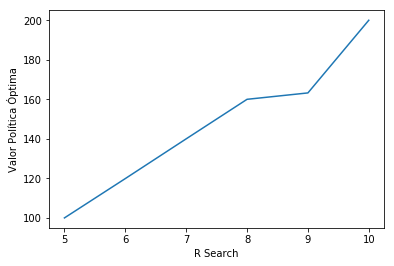

In [24]:
valor_maximo = max(valorpolitica) 

# Sumo 5 al valor del indice que me indica R Search ya que defini un vector que va de 5 a 10
# Por eso es que R Search = numeroposicion+5, asi por ejemplo la poisicion 0 representa el R search = 5
r_optimo = valorpolitica.index(valor_maximo)+5

print('El retorno máximo esperado total para todos los estados {} para Alfa= {} y Beta= {} se obtiene con R Search= {}'.format(valor_maximo, alfa, beta, r_optimo))
plt.plot(r_search, valorpolitica, '-')
plt.xlabel('R Search')
plt.ylabel('Valor Política Óptima')

plt.show()

### Punto 3

3.1 Plantee una función de recompensa que permita al agente aprender a lograr el objetivo expresado en 3.

Para empezar, planteo el modelo donde cada paso realizado tiene un reward negativo de -1 ya que lo que se busca es llegar a la posicion G ejecutando el menor número de accines.

Por otra parte, las acciones que llevan al agente fuera de la grilla tiene un reward negativo menor al reward negativo que se obtiene por cualquier otro paso. Con esto se indica al agente que es preferible acciones que mantienen al mismo dentro de la grilla.

Finalmente, aquellas acciones que llevan al agente a la posicion destino G son premiadas con un reward positivo. 

In [25]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S = [0, 0]
G = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S
            reward['U'] = -3.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S
            reward['D'] = -3.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S
            reward['L'] = -3.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S
            reward['R'] = -3.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
            
        if i==3 and j==2:
            next['R'] = G
            reward['R'] = 10
            
        if i==2 and j==3:
            next['D'] = G
            reward['D'] = 10        

        nextState[i].append(next)
        actionReward[i].append(reward)

3.2 Implemente un algoritmo basado en Iteración de Valor para aprender la política óptima en el entorno especificado.

In [26]:
iteracion = []
evolucion = []  
nroiteracion = 0

primero = True
v_max = 0
rewards = []

#Iteración de Valor
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    politica_optima = []
    for i in range(0, WORLD_SIZE):
        politica_optima.append([])  
        for j in range(0, WORLD_SIZE):
            politica_optima[i].append([])  
            for action in actions:
                newPosition = nextState[i][j][action]
                
                # Actualización basada en Bellman
                if primero:
                    v_max = (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                    newWorld[i, j] = v_max
                    primero = False
                else:
                    temp = (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])           
                    if temp >= v_max:
                        v_max = temp
                        newWorld[i, j] = v_max
            primero = True       
 
            for action in actions:
                newPosition = nextState[i][j][action]
                
                #Buscamos aquellas acciones que generan el mayor reward en un determinado estado.
                v = (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                if v == newWorld[i, j]:
                    politica_optima[i][j].append(action)                  
                    
                                   
    #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteracion
    evolucion.append(np.sum(np.abs(world - newWorld)))
    nroiteracion += 1
    
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        print(newWorld)
        print('Acciones de la Política Óptima')
        print(np.array(politica_optima))
        break
    
    world = newWorld
    

Política Optima
[[ 24.18621462  27.98469417  32.20521462  36.89469417]
 [ 27.98469417  32.20521462  36.89469417  42.10521462]
 [ 32.20521462  36.89469417  42.10521462  47.89469417]
 [ 36.89469417  42.10521462  47.89469417  42.10521462]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


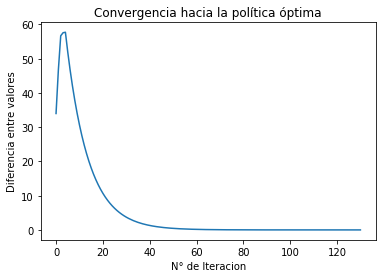

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(0, nroiteracion), evolucion, '-')
plt.xlabel('N° de Iteracion')
plt.ylabel('Diferencia entre valores')
plt.title('Convergencia hacia la política óptima')
plt.show()

3.3 Realice una gráfica que permita evaluar como cambia el valor de la política óptima en relación al factor de descuento $\gamma$.

Creo un vector descuentos donde indico como va a variar el valor de gama para ir calculando los valores de las políticas óptimas, siendo gama = 0 donde se prioriza el rewad inmediato y un gama=1 maximo donde se tiene en cuenta los reward a largo plazo.

In [28]:
descuentos = np.linspace(0.1, 0.9, 9)
print(descuentos)

[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


In [29]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S_POS = [0, 0]
G_POS = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se obtiene la función de transición y la función de reward
#actionReward, nextState = reward_nexstate()

nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S
            reward['U'] = -3.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S
            reward['D'] = -3.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S
            reward['L'] = -3.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S
            reward['R'] = -3.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
            
        if i==3 and j==2:
            next['R'] = G
            reward['R'] = 10
            
        if i==2 and j==3:
            next['D'] = G
            reward['D'] = 10        

        nextState[i].append(next)
        actionReward[i].append(reward)

Para el descuento:  0.1
Política Optima
[[ -1.11100100e+00  -1.11000000e+00  -1.10000100e+00  -1.00000000e+00]
 [ -1.11000000e+00  -1.10000100e+00  -1.00000000e+00  -1.00000000e-06]
 [ -1.10000100e+00  -1.00000000e+00  -1.00000000e-06   1.00000000e+01]
 [ -1.00000000e+00  -1.00000000e-06   1.00000000e+01  -1.00000000e-06]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


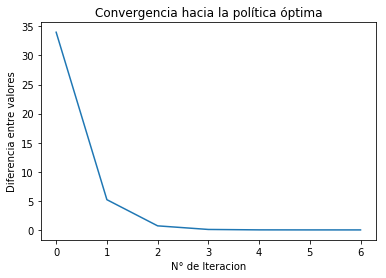

Para el descuento:  0.2
Política Optima
[[ -1.24633344  -1.2316672   -1.15833344  -0.7916672 ]
 [ -1.2316672   -1.15833344  -0.7916672    1.04166656]
 [ -1.15833344  -0.7916672    1.04166656  10.2083328 ]
 [ -0.7916672    1.04166656  10.2083328    1.04166656]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


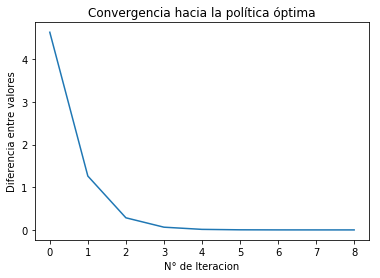

Para el descuento:  0.3
Política Optima
[[ -1.3991986   -1.33066139  -1.1021986   -0.34066139]
 [ -1.33066139  -1.1021986   -0.34066139   2.1978014 ]
 [ -1.1021986   -0.34066139   2.1978014   10.65933861]
 [ -0.34066139   2.1978014   10.65933861   2.1978014 ]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


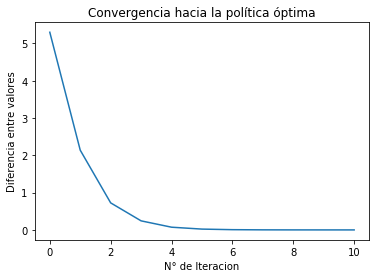

Para el descuento:  0.4
Política Optima
[[ -1.53257512  -1.33143064  -0.82857512   0.42856936]
 [ -1.33143064  -0.82857512   0.42856936   3.57142488]
 [ -0.82857512   0.42856936   3.57142488  11.42856936]
 [  0.42856936   3.57142488  11.42856936   3.57142488]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


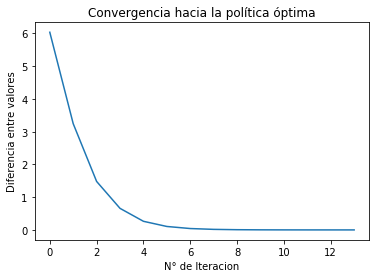

Para el descuento:  0.5
Política Optima
[[ -1.54167339  -1.08333806  -0.16667339   1.66666194]
 [ -1.08333806  -0.16667339   1.66666194   5.33332661]
 [ -0.16667339   1.66666194   5.33332661  12.66666194]
 [  1.66666194   5.33332661  12.66666194   5.33332661]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


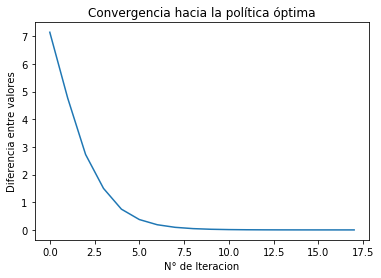

Para el descuento:  0.6
Política Optima
[[ -1.16350575  -0.27250705   1.21249425   3.68749295]
 [ -0.27250705   1.21249425   3.68749295   7.81249425]
 [  1.21249425   3.68749295   7.81249425  14.68749295]
 [  3.68749295   7.81249425  14.68749295   7.81249425]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


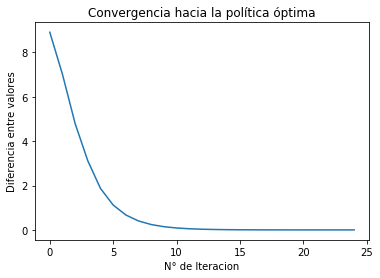

Para el descuento:  0.7
Política Optima
[[  0.29169244   1.84527915   4.06469244   7.23527915]
 [  1.84527915   4.06469244   7.23527915  11.76469244]
 [  4.06469244   7.23527915  11.76469244  18.23527915]
 [  7.23527915  11.76469244  18.23527915  11.76469244]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


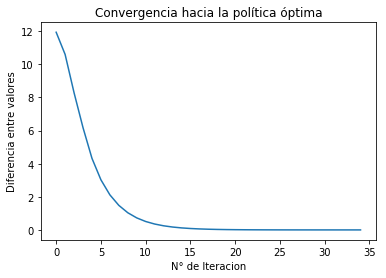

Para el descuento:  0.8
Política Optima
[[  5.01242253   7.51553257  10.64442253  14.55553257]
 [  7.51553257  10.64442253  14.55553257  19.44442253]
 [ 10.64442253  14.55553257  19.44442253  25.55553257]
 [ 14.55553257  19.44442253  25.55553257  19.44442253]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


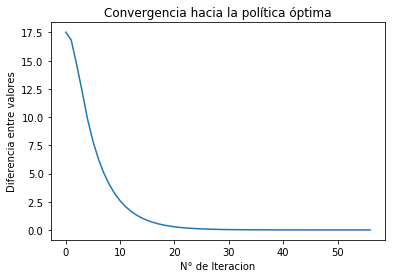

Para el descuento:  0.9
Política Optima
[[ 24.18621057  27.9846835   32.20521057  36.8946835 ]
 [ 27.9846835   32.20521057  36.8946835   42.10521057]
 [ 32.20521057  36.8946835   42.10521057  47.8946835 ]
 [ 36.8946835   42.10521057  47.8946835   42.10521057]]
Acciones de la Política Óptima
[[['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R', 'D'] ['R', 'D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


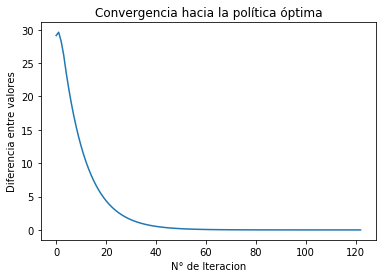

In [30]:
valorpolitica = []
for descuento in descuentos:
    
    evolucion = []  
    nroiteracion = 0

    primero = True

    #Iteración de Valor
    while True:
        # Se itera hasta lograr la convergencia
        newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
        politica_optima = []
        for i in range(0, WORLD_SIZE):
            politica_optima.append([])  
            for j in range(0, WORLD_SIZE):
                politica_optima[i].append([])  
                for action in actions:
                    newPosition = nextState[i][j][action]

                    # Actualización basada en Bellman
                    if primero:
                        v_max = (actionReward[i][j][action] + descuento * world[newPosition[0], newPosition[1]])
                        newWorld[i, j] = v_max
                        primero = False
                    else:
                        temp = (actionReward[i][j][action] + descuento * world[newPosition[0], newPosition[1]])           
                        if temp >= v_max:
                            v_max = temp
                            newWorld[i, j] = v_max
                primero = True       

                for action in actions:
                    newPosition = nextState[i][j][action]

                    #Buscamos aquellas acciones que generan el mayor reward en un determinado estado.
                    v = (actionReward[i][j][action] + descuento * world[newPosition[0], newPosition[1]])
                    if v == newWorld[i, j]:
                        politica_optima[i][j].append(action)                  


        #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteracion
        evolucion.append(np.sum(np.abs(world - newWorld)))
        nroiteracion += 1

        if np.sum(np.abs(world - newWorld)) < 1e-4:
            print('Para el descuento: ', descuento)
            print('Política Optima')
            print(newWorld)
            print('Acciones de la Política Óptima')
            print(np.array(politica_optima))
            valorpolitica.append(np.sum(newWorld))           
            break
            
        world = newWorld
    
    plt.plot(range(0, nroiteracion), evolucion, '-')
    plt.xlabel('N° de Iteracion')
    plt.ylabel('Diferencia entre valores')
    plt.title('Convergencia hacia la política óptima')
    plt.show()

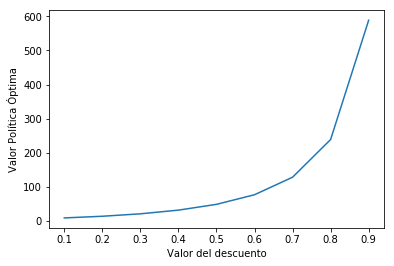

In [31]:
plt.plot(descuentos, valorpolitica, '-')
plt.xlabel('Valor del descuento')
plt.ylabel('Valor Política Óptima')

plt.show()

### Punto 4

4. Implemente la solución de los ejercicios anteriores empleando Iteración de Política. 

4.1 En el primer punto lo que hice fue agregarle a mi algoritmo de iteracion de valor, el cambio de las probabilidades de las acciones pertenecientes a la politica, de acuerdo si esa accion era una o no de las acciones que devuelven el valor optimo para un determinado estado.

Se parte de la definición original del modelo:

In [32]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = [i, j]
            reward['U'] = -1.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = 0.0

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
            reward['D'] = -1.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = 0.0

        if j == 0:
            next['L'] = [i, j]
            reward['L'] = -1.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = 0.0

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
            reward['R'] = -1.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = 0.0

        if [i, j] == A_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = A_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 10.0

        if [i, j] == B_POS:
            next['L'] = next['R'] = next['D'] = next['U'] = B_PRIME_POS
            reward['L'] = reward['R'] = reward['D'] = reward['U'] = 5.0

        nextState[i].append(next)
        actionReward[i].append(reward)

En la siguiente celda se obvserva que a medida que voy obteniendo las politicas se buscan que acciones generan ese valor optimo para cada estado, y se asigna a aquellas acciones las probabilidad correspondiente, mientras que las acciones que no  genrean tienen una probabilidad de 0. Esto ayuda a que en las proximas iteraciones de politica  se pueda buscar una aun mejor teniendo en cuenta la politica anterior utilizada con sus correspondientes probabilidades.

In [33]:
evolucion = []  
iteracion = 0

primero = True

#Iteración de Valor
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    politica_optima = []
    for i in range(0, WORLD_SIZE):
        politica_optima.append([]) 
        for j in range(0, WORLD_SIZE):
            politica_optima[i].append([])  
            for action in actions:
                newPosition = nextState[i][j][action]
                
                # Actualización basada en Bellman
                if primero:
                    v_max = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                    newWorld[i, j] = v_max
                    primero = False
                else:
                    temp = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])           
                    if temp >= v_max:
                        v_max = temp
                        newWorld[i, j] = v_max
                        
            primero = True       
            cant_actions = 0
            for action in actions:
                newPosition = nextState[i][j][action]
                #Buscamos aquellas acciones que generan el mayor reward en un determinado estado.
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                if v == newWorld[i, j]:
                    politica_optima[i][j].append(action)
                    cant_actions += 1
            
            #Aca se puede ver que si en el estado newWorld[i, j] la política óptima esta dada por mas de una accion
            #La probabiliadad que le corresponde a cada accion en la politica optima esta dada por 1/cant_actions
            for action in actions:
                if action in politica_optima[i][j]:
                    actionProb[i][j][action] = 1/cant_actions
                else:
                    actionProb[i][j][action] = 0 
                                   
    #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteracion
    evolucion.append(np.sum(np.abs(world - newWorld)))
    iteracion += 1
        
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        print(newWorld)
        print('Acciones de la Política Óptima')
        print(np.array(politica_optima))
        break
    
    world = newWorld

Política Optima
[[ 2.63967146  2.93296829  2.63967146  1.52858452  1.37572607]
 [ 2.37568344  2.63967146  2.37568344  1.37572607  1.23815342]
 [ 2.13811502  2.37568344  2.13811502  1.23815342  1.11433808]
 [ 1.92430352  2.13811502  1.92430352  1.11433808  1.00290427]
 [ 1.73187317  1.92430352  1.73187317  1.00290427  0.90261369]]
Acciones de la Política Óptima
[[['R'] ['L', 'U', 'R', 'D'] ['L'] ['L', 'U', 'R', 'D'] ['L']]
 [['U'] ['U'] ['U'] ['U'] ['U']]
 [['U'] ['U'] ['U'] ['U'] ['U']]
 [['U'] ['U'] ['U'] ['U'] ['U']]
 [['U'] ['U'] ['U'] ['U'] ['U']]]


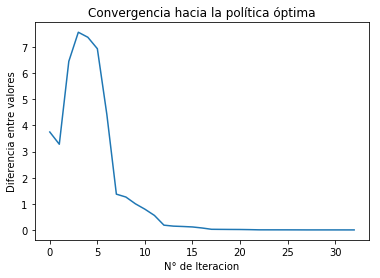

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(0, iteracion), evolucion, '-')
plt.xlabel('N° de Iteracion')
plt.ylabel('Diferencia entre valores')
plt.title('Convergencia hacia la política óptima')
plt.show()

4.2 Para realizar la iteración de política para el modelo del robot de reciclaje se tomó como base el algoritmo propuesto por los profesores de la catedra. Ya que es en este caso (A diferencia de los modelos correspondientes a los puntos 1 y 3) donde cada estado tiene una UNICA accion optima que genera el valor de la política óptima. 

In [35]:
import numpy as np

# Estados
HIGH = 0
LOW = 1

# Acciones
SEARCH = 0
WAIT = 1
RECHARGE = 2

states = [HIGH, LOW]
actions = [SEARCH, WAIT, RECHARGE]
N_STATES = len(states)
N_ACTIONS = len(actions)
P = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Probabilidades de Transición
R = np.zeros((N_STATES, N_ACTIONS, N_STATES))  # Rewards


alfa = 0.70
beta = 0.30
r_search = 10
r_wait = 5

# ( s  ,  a   , s')
P[HIGH,SEARCH,HIGH] = alfa
P[HIGH,SEARCH,LOW] = 1 - alfa
P[LOW,SEARCH,HIGH] = 1 - beta
P[LOW,SEARCH,LOW] = beta
P[HIGH,WAIT,HIGH] = 1.0
P[HIGH,WAIT,LOW] = 0.0
P[LOW,WAIT,HIGH] = 0.0
P[LOW,WAIT,LOW] = 1.0
P[LOW,RECHARGE,HIGH] = 1.0
P[LOW,RECHARGE,LOW] = 0.0

# ( s  ,  a   , s')
R[HIGH,SEARCH,HIGH] = r_search
R[HIGH,SEARCH,LOW] = r_search
R[LOW,SEARCH,HIGH] = -3
R[LOW,SEARCH,LOW] = r_search
R[HIGH,WAIT,HIGH] = r_wait
R[HIGH,WAIT,LOW] = r_wait
R[LOW,WAIT,HIGH] = r_wait
R[LOW,WAIT,LOW] = r_wait
R[LOW,RECHARGE,HIGH] = 0
R[LOW,RECHARGE,LOW] = 0

# factor de descuento
gamma = 0.9

In [36]:
# inicializa la política y la función de valor
policy = [0 for s in range(N_STATES)]
V = np.zeros(N_STATES)

print("Política Inicial")
print(policy)

is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    # corre la iteración de valor para cada estado 
    for s in range(N_STATES):
        V[s] = sum([P[s,policy[s],s1] * (R[s,policy[s],s1] + gamma*V[s1]) for s1 in range(N_STATES)])
        
    # realiza la mejora de la política
    for s in range(N_STATES):
        q_best = V[s]
        for a in range(N_ACTIONS):
            q_sa = sum([P[s, a, s1] * (R[s, a, s1] + gamma * V[s1]) for s1 in range(N_STATES)])
            if q_sa > q_best:
                #print("State", s, ": q_sa", q_sa, "q_best", q_best)
                policy[s] = a
                q_best = q_sa
                is_value_changed = True

    #print ("Iteracion:", iterations)

print ("Política Final")
print (policy)
print (V)

Política Inicial
[0, 0]
Política Final
[0, 2]
[ 78.74015748  70.86614173]


4.3 Al igual que en el punto 4.1 se modifican las probabilidades en cada una de las iteraciones de política para conseguir de esa manera la óptima 

In [37]:
from __future__ import print_function
import numpy as np

# Límites de la grilla y posiciones especiales
WORLD_SIZE = 4
S = [0, 0]
G = [3, 3]
discount = 0.9

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# acciones left, up, right, down
actions = ['L', 'U', 'R', 'D']

# se agrega en actionProb la probabilidad de las acciones para la política
actionProb = []
for i in range(0, WORLD_SIZE):
    actionProb.append([])
    for j in range(0, WORLD_SIZE):
        actionProb[i].append(dict({'L':0.25, 'U':0.25, 'R':0.25, 'D':0.25}))

# se setea la función de transición y la función de reward        
nextState = []
actionReward = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    actionReward.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        reward = dict()
        if i == 0:
            next['U'] = S
            reward['U'] = -3.0
        else:
            next['U'] = [i - 1, j]
            reward['U'] = -1.0

        if i == WORLD_SIZE - 1:
            next['D'] = S
            reward['D'] = -3.0
        else:
            next['D'] = [i + 1, j]
            reward['D'] = -1.0

        if j == 0:
            next['L'] = S
            reward['L'] = -3.0
        else:
            next['L'] = [i, j - 1]
            reward['L'] = -1.0

        if j == WORLD_SIZE - 1:
            next['R'] = S
            reward['R'] = -3.0
        else:
            next['R'] = [i, j + 1]
            reward['R'] = -1.0
            
        if i==3 and j==2:
            next['R'] = G
            reward['R'] = 10
            
        if i==2 and j==3:
            next['D'] = G
            reward['D'] = 10        

        nextState[i].append(next)
        actionReward[i].append(reward)
 

In [38]:
iteracion = []
evolucion = []  
iteracion = 0

primero = True

#Iteración de Valor
while True:
    # Se itera hasta lograr la convergencia
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    politica_optima = []
    for i in range(0, WORLD_SIZE):
        politica_optima.append([])  
        for j in range(0, WORLD_SIZE):
            politica_optima[i].append([])  
            for action in actions:
                newPosition = nextState[i][j][action]
                
                # Actualización basada en Bellman
                if primero:
                    v_max = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                    newWorld[i, j] = v_max
                    primero = False
                else:
                    temp = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])           
                    if temp >= v_max:
                        v_max = temp
                        newWorld[i, j] = v_max
            primero = True 
            cant_actions = 0 
            for action in actions:
                newPosition = nextState[i][j][action]
                
                #Buscamos aquellas acciones que generan el mayor reward en un determinado estado.
                v = actionProb[i][j][action] * (actionReward[i][j][action] + discount * world[newPosition[0], newPosition[1]])
                if v == newWorld[i, j]:
                    politica_optima[i][j].append(action)
                    cant_actions += 1
            
            #Aca se puede ver que si en el estado newWorld[i, j] la política óptima esta dada por mas de una accion
            #La probabiliadad que le corresponde a cada accion en la politica optima esta dada por 1/cant_actions
            for action in actions:
                if action in politica_optima[i][j]:
                    actionProb[i][j][action] = 1/cant_actions
                else:
                    actionProb[i][j][action] = 0     
                                   
    #Para cada iteracion se guarda la diferencia en un vector, donde la ubicacion corresponde al numero de iteracion
    evolucion.append(np.sum(np.abs(world - newWorld)))
    iteracion += 1
    
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Política Optima')
        print(newWorld)
        print('Acciones de la Política Óptima')
        print(np.array(politica_optima))
        break
    
    world = newWorld

Política Optima
[[  0.87062084   3.04582614   4.49537084  11.10082614]
 [  3.04582614   4.49537084  11.10082614  13.44537084]
 [  4.49537084  11.10082614   6.72268542  16.05041307]
 [ 11.10082614  13.44537084  16.05041307   6.72268542]]
Acciones de la Política Óptima
[[['R', 'D'] ['D'] ['R', 'D'] ['D']]
 [['R'] ['R', 'D'] ['R'] ['D']]
 [['R', 'D'] ['D'] ['R', 'D'] ['D']]
 [['R'] ['R'] ['R'] ['L', 'U']]]


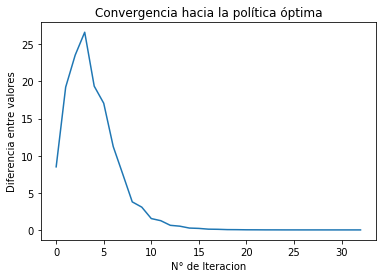

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(0, iteracion), evolucion, '-')
plt.xlabel('N° de Iteracion')
plt.ylabel('Diferencia entre valores')
plt.title('Convergencia hacia la política óptima')
plt.show()

FIN